#ML Exp 2C

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('placement.csv')

In [ ]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package in LPA')

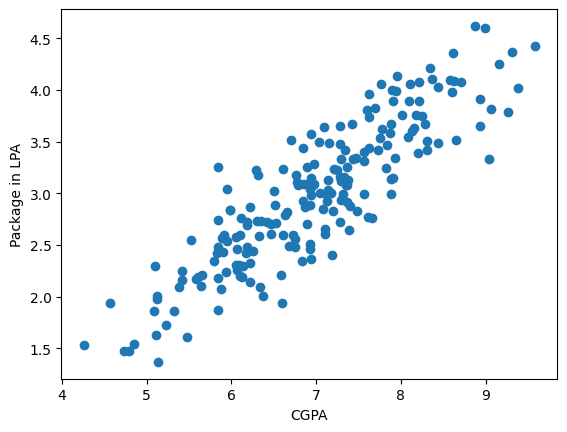

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [ ]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [ ]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

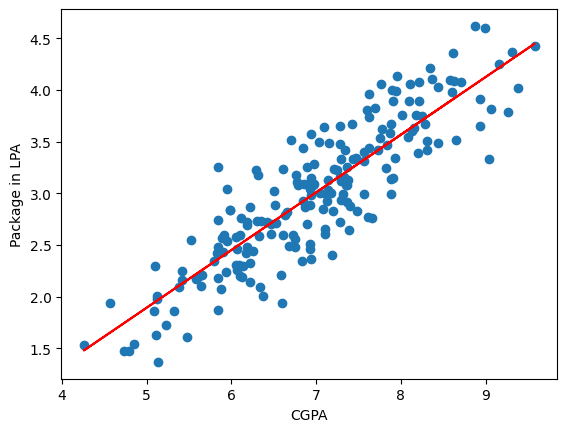

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=lr.predict(x_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

MAE 0.2884710931878175
MSE 0.12129235313495527


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [ ]:
print("R2 Score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 Score 0.780730147510384


In [ ]:
# Adjusted R2 Score
x_test.shape

(40, 1)

In [ ]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [ ]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)

new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.031375,3.26
1,5.12,0.018619,1.98
2,7.82,0.090943,3.25
3,7.42,0.863075,3.67
4,6.94,0.198480,3.57


Text(0, 0.5, 'Package in LPA')

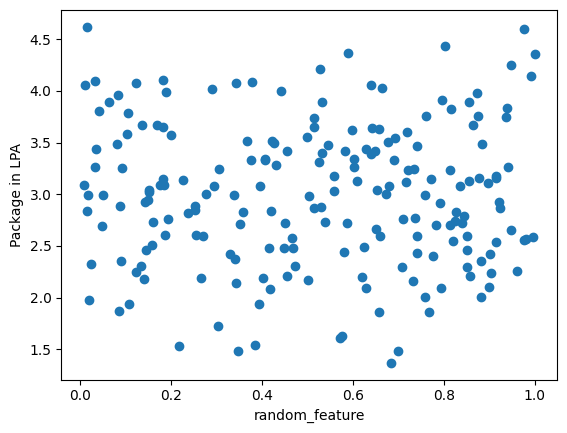

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package in LPA')

In [ ]:
x=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [ ]:
x


,cgpa,random_feature
0,6.89,0.031375
1,5.12,0.018619
2,7.82,0.090943
3,7.42,0.863075
4,6.94,0.198480
...,...,...
195,6.93,0.144432
196,5.89,0.980171
197,7.21,0.305601
198,7.63,0.082692


In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create input widgets for CGPA and random_feature
cgpa_input = widgets.FloatText(description="CGPA:")

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Define a function to handle prediction
def predict_package(button):
    cgpa = cgpa_input.value
    input_data = [[cgpa]]  # Assuming lr is your trained model
    predicted_package = lr.predict(input_data)[0]  # Get prediction from model
    print(f"\nPredicted Package: {predicted_package:.2f} LPA")

# Link the button to the prediction function
predict_button.on_click(predict_package)

# Display the widgets
display(cgpa_input,predict_button)

FloatText(value=0.0, description='CGPA:')

Button(description='Predict', style=ButtonStyle())


Predicted Package: 4.13 LPA


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
